In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

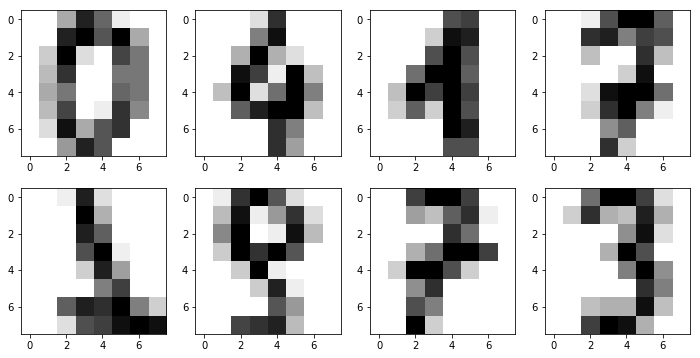

In [2]:
ld = load_digits()
labels = ld.target
features = pd.DataFrame(ld.data)
fig, ax = plt.subplots(2,4, figsize=(12,6))
ax[0][0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0][1].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0][2].imshow(features.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0][3].imshow(features.iloc[300].values.reshape(8,8), cmap='gray_r')
ax[1][0].imshow(features.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1][1].imshow(features.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1][2].imshow(features.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1][3].imshow(features.iloc[1300].values.reshape(8,8), cmap='gray_r')
plt.show()

# k-nearest neighbor

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [4]:
def train_test_cross(k=4):
    knn = KNeighborsClassifier()
    kf = KFold(random_state=5, n_splits=k, shuffle=True)
    accs = []
    for train_i, test_i in kf.split(features):
        train_f = features.loc[train_i]
        test_f = features.loc[test_i]
        train_l = labels[train_i]
        test_l = labels[test_i]
        knn.fit(train_f, train_l)
        preds = knn.predict(test_f)
        acc = accuracy_score(test_l, preds)
        accs.append(acc)
    return np.mean(accs)

train_test_cross()

0.9827493194753774

The k-nearest neighbors classifier with k fold cross validation has impressive accuracy.

In [5]:
ks = range(2,62,5)
accs = []
for k in ks:
    accs.append(train_test_cross(k))
accs

[0.9749554689570941,
 0.9844184269038355,
 0.9849739000745713,
 0.9855398763278896,
 0.9855328351263313,
 0.987738077290316,
 0.986656093358396,
 0.9866243794815223,
 0.9877392817592152,
 0.9877824676256926,
 0.987152553329024,
 0.9871427560837578]

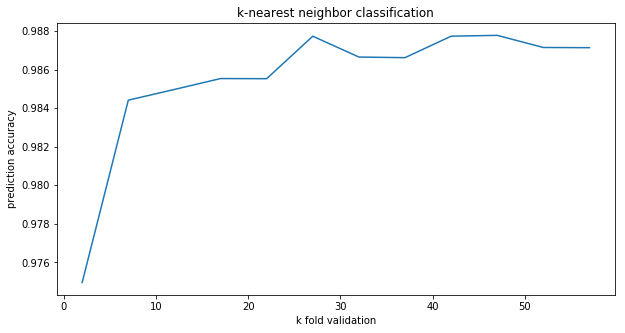

In [6]:
plt.figure(figsize=(10,5))
plt.plot(ks, accs)
plt.ylabel('prediction accuracy')
plt.xlabel('k fold validation')
plt.title('k-nearest neighbor classification')
plt.show()

With an increasing number of folds, accuracy generally improves, but the improvements with each step are diminishing.

# neural networks with one hidden layer

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
def nn(k,ns):
    kff = KFold(k, shuffle=True)
    accs_o_train = []
    accs_o_test = []
    for n in ns:
        nn = MLPClassifier(hidden_layer_sizes=n, solver='lbfgs')
        accs_i_train = []
        accs_i_test = []
        for train_i, test_i in kff.split(features):
            train_f = features.loc[train_i]
            test_f = features.loc[test_i]
            train_l = labels[train_i]
            test_l = labels[test_i]
            nn.fit(train_f, train_l)
            preds_train = nn.predict(train_f)
            preds_test = nn.predict(test_f)
            acc_train = accuracy_score(train_l, preds_train)
            acc_test = accuracy_score(test_l, preds_test)
            accs_i_train.append(acc_train)
            accs_i_test.append(acc_test)
        accs_o_train.append(np.mean(accs_i_train))
        accs_o_test.append(np.mean(accs_i_test))
    return accs_o_train, accs_o_test

In [9]:
ns = [10, 64, 128]
nn1 = nn(4, ns);

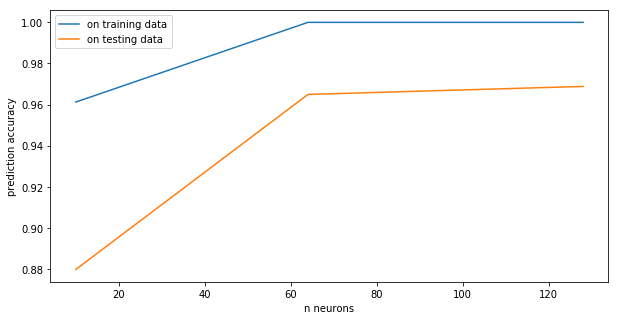

In [10]:
plt.figure(figsize=(10,5))
plt.plot(ns, nn1[0], label='on training data')
plt.plot(ns, nn1[1], label='on testing data')
plt.xlabel('n neurons')
plt.ylabel('prediction accuracy')
plt.legend()
plt.show()

The neural networks, with only one inner layer, are performing very well. The models do not appear to be overfitting, either. The more neurons our models have, the better they perform, although the accuracy appears to approach a horizontal asymptote with increasing numbers of neurons.

# neural networks with 2 hidden layers

In [11]:
nn2 = nn(4,[(10,10),(64,64),(128,128)])

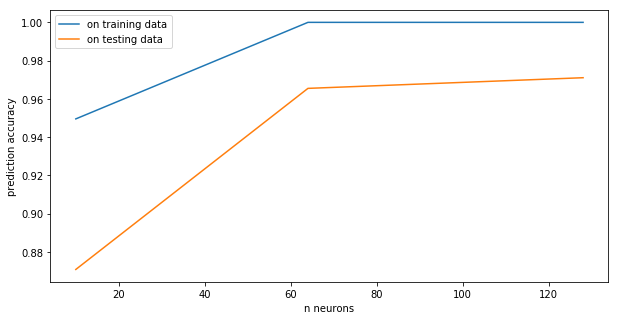

In [12]:
ns = [10, 64, 128]
plt.figure(figsize=(10,5))
plt.plot(ns, nn2[0], label='on training data')
plt.plot(ns, nn2[1], label='on testing data')
plt.xlabel('n neurons')
plt.ylabel('prediction accuracy')
plt.legend()
plt.show()

# neural networks with 3 hidden layers

In [13]:
nn3 = nn(4,[(10,10,10),(64,64,64),(128,128,128)])

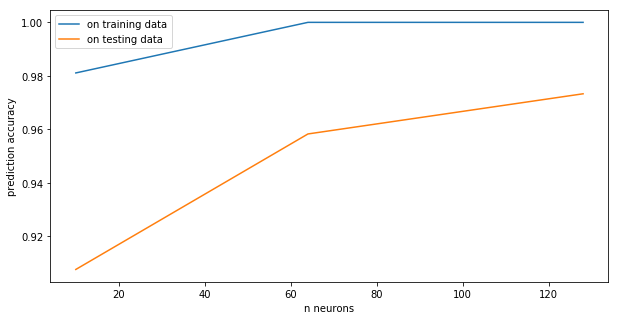

In [14]:
ns = [10, 64, 128]
plt.figure(figsize=(10,5))
plt.plot(ns, nn3[0], label='on training data')
plt.plot(ns, nn3[1], label='on testing data')
plt.xlabel('n neurons')
plt.ylabel('prediction accuracy')
plt.legend()
plt.show()

# comparing layer sizes

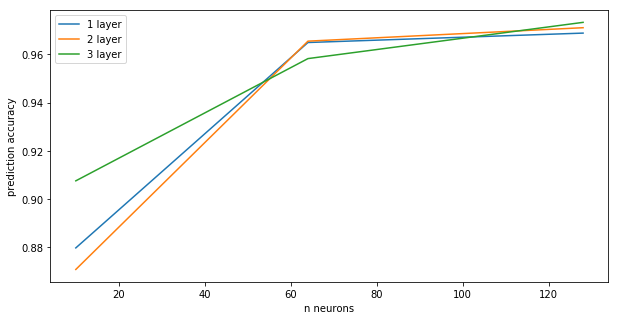

In [15]:
plt.figure(figsize=(10,5))
plt.plot(ns, nn1[1], label='1 layer')
plt.plot(ns, nn2[1], label='2 layer')
plt.plot(ns, nn3[1], label='3 layer')
plt.xlabel('n neurons')
plt.ylabel('prediction accuracy')
plt.legend()
plt.show()

Like adding the second layer, this layer resulted in little to no gains in accuracy. This is typical for models approaching this level of accuracy. With near perfect accuracy, adding complexity to the model makes increasingly small contributions to overall accuracy. Exposing the model to more data could help us break through this accuracy ceiling we are approaching.